In [1]:
!pip install plotly

In [22]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn.preprocessing import StandardScaler

In [8]:
# read the dataset using pandas
df= pd.read_csv(r'R:\Data Science\Assignment\DS\ML\Project 4 - ML\Online Retail.csv')


In [9]:
# This displays the top 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [10]:
# This displays the top 5 rows of the data
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-11 12:50,4.95,12680.0,France


In [11]:
# Provides some information regarding the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
# this describes the basic stat behind the dataset used 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df[['Description', 'CustomerID']] = df[['Description', 'CustomerID']].fillna(0)


In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
# Select numeric features for clustering (ignoring InvoiceNo, Description, InvoiceDate, and Country)
numeric_features = ['Quantity', 'UnitPrice', 'CustomerID']
df_numeric = df[numeric_features]

In [23]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [24]:
# Use the Elbow Method to determine optimal K
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


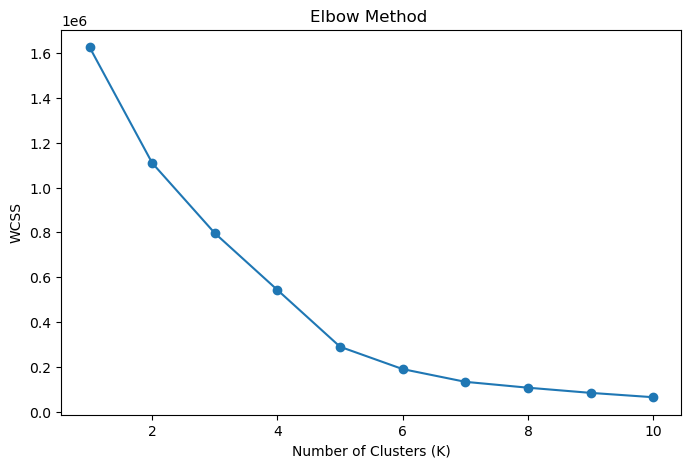

In [26]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method ')
plt.show()

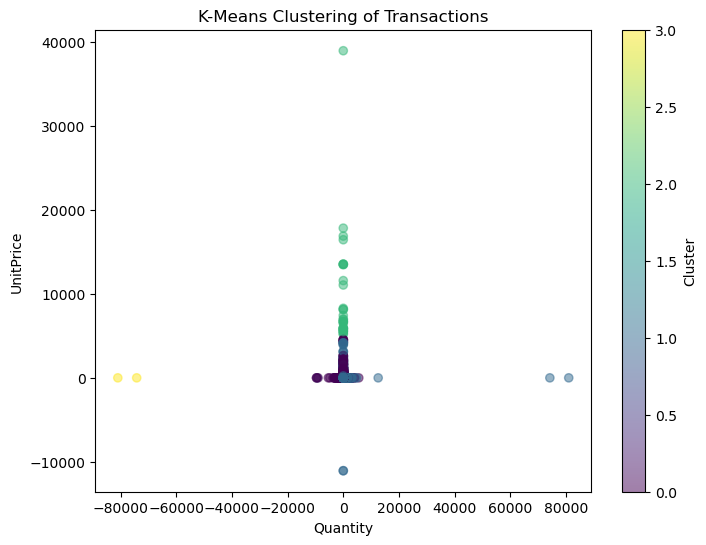

In [28]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize Clusters (Using Quantity vs. UnitPrice for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('K-Means Clustering of Transactions')
plt.colorbar(label="Cluster")
plt.show()

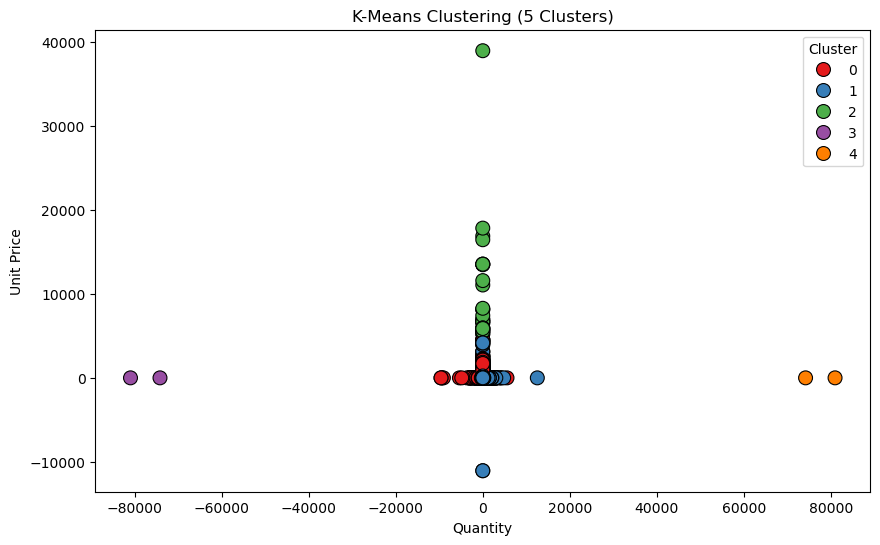

In [30]:

optimal_k = 5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters using Quantity & UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Quantity'], y=df['UnitPrice'], hue=df['Cluster'], palette='Set1', s=100, edgecolor='black')
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title("K-Means Clustering (5 Clusters)")
plt.legend(title="Cluster")
plt.show()